In [8]:
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize
from pprint import pprint

#import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
#import cufflinks as cf
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

from scipy import stats
from scipy.fftpack import fft

from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.linear_model import ARDRegression, LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
import pandas as pd
import numpy as np

## Data cleaning

In [10]:
df = pd.read_csv('..\UseCase_3_Datasets\sales_granular.csv')

In [11]:
df.head()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
4,10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for index, boolean in enumerate(df.store_code.duplicated()):
    if boolean: print index

33
34
35


In [13]:
# inspect duplicate
df.loc[df.store_code == df.store_code[33]]

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
32,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
33,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
34,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
35,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Lines 33, 34 and 35 are identical to line 32
df.drop(df.index[[33, 34, 35]], inplace=True)

In [15]:
df.store_code.is_unique

True

#### DateTime transformation

In [16]:
df.set_index('store_code', inplace=True)

In [17]:
df.columns = pd.to_datetime(df.columns)

In [18]:
df.head()

,2015-08-03 09:00:00,2015-08-03 10:00:00,2015-08-03 11:00:00,2015-08-03 12:00:00,2015-08-03 13:00:00,2015-08-03 14:00:00,2015-08-03 15:00:00,2015-08-03 16:00:00,2015-08-03 17:00:00,2015-08-03 18:00:00,...,2017-06-25 13:00:00,2017-06-25 14:00:00,2017-06-25 15:00:00,2017-06-25 16:00:00,2017-06-25 17:00:00,2017-06-25 18:00:00,2017-06-25 19:00:00,2017-06-25 20:00:00,2017-06-25 21:00:00,2017-06-25 22:00:00
store_code,,,,,,,,,,,,,,,,,,,,,
10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean impossible value

In [19]:
#remove all negative value as t is impossible to have negative value for sales volume
df = df.applymap(lambda x: 0 if x < 0 else x)

In [20]:
# In order to guess how to decide the timeframe that will suit the most the problem,
# we can use the frequency domain to obeserve pick and cycle in sales
# later

## Timeframe resample

In [21]:
df2 = df.T

In [22]:
df3 = df2.resample('5D').sum()

In [23]:
df3.shape

(139, 903)

In [24]:
df3.dropna(axis=1, how='all', inplace=True)

In [25]:
df3.shape

(139, 903)

In [26]:
df3.head()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3870.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1770.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-13 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1920.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-18 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5430.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5550.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Creation of a dataset (X and y)

In [27]:
X=[]
y=[]


for index, column in enumerate(df3):
    if index % 50 == 0:
        print index, len(X)
    for stop in np.arange(50, len(df3[column])):
        start = stop - 50
            
        if not (df3[column][start:stop].isnull().values.any() or np.isnan(df3[column][stop])):
            X.append([df3[column][start:stop].values])
            y.append([df3[column][stop]])


0 0
50 1096
100 1658
150 2069
200 2590
250 2848
300 3117
350 3143
400 3199
450 3208
500 3537
550 3584
600 3806
650 3942
700 4031
750 4054
800 4261
850 5163
900 6217


In [28]:
X = np.array(X).squeeze()

In [29]:
y = np.array(y).squeeze()

In [30]:
X[0]

array([   30.,    30.,   300.,   600.,   360.,   120.,   990.,  2520.,
         360.,  1080.,  2010.,   780.,  3180.,   690.,  2520.,   480.,
        3030.,  3870.,  1230.,  2730.,  2160.,  2130.,  3690.,  4380.,
        6180.,  1980.,  3360.,  3300.,  4560.,  4740.,   990.,  3930.,
        2730.,  2910.,  4140.,  3870.,  5370.,  2010.,  4800.,  1320.,
        3150.,  3060.,  4410.,  3330.,  4710.,  5580.,  3240.,  3570.,
        3600.,  5670.])

#### Draw sales volume for 10 weeks for several POS

In [31]:
# Create traces
trace0 = go.Scatter(
    y = X[0],
    x = np.arange(0, X[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace1 = go.Scatter(
    y = X[2500],
    x = np.arange(0, X[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = go.Scatter(
    y = X[5000],
    x = np.arange(0, X[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

In [32]:
data = [trace0, trace1, trace2]

In [33]:
layout = go.Layout(showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='show-legend')

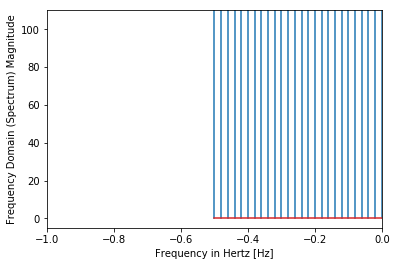

In [34]:
from scipy import fftpack

f_s=1

fX = fftpack.fft(X[0])
freqs = fftpack.fftfreq(len(X[0])) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(fX))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

plt.show()

## Periodical feature

In [140]:
Xangle = np.angle(np.fft.fft2(X))

In [141]:
X.shape

(6295L, 50L)

In [146]:
Xangle.shape

(6295L, 50L)

In [158]:
Xperiodic = np.append(Xangle, X, axis=1)

## Regression models

#### Split dataset into test and train datasets

In [159]:
shuffleX, shuffley = shuffle(Xperiodic, y)

In [162]:
shuffleX[:(len(Xperiodic)/5)].shape

(1259L, 100L)

In [163]:
# Take 1/5 of the dataset to test
testX, testy = shuffleX[:(len(Xperiodic)/5)], shuffley[:(len(Xperiodic)/5)]
trainX, trainy = shuffleX[(len(Xperiodic)/5):], shuffley[(len(Xperiodic)/5):]

#### simple model : linear regression

In [165]:
linear = LinearRegression()
linear.fit(trainX, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
y_pred = linear.predict(testX)

In [167]:
MAE = mean_absolute_error(y_pred, testy)
MAE

1253.3645132506438

In [168]:
MAE/50

25.067290265012875

In [169]:
testX.mean()

2417.372205654161

In [108]:
testX

array([[   360.,    930.,    720., ...,    540.,    600.,    480.],
       [   120.,   1020.,    300., ...,   4470.,   4170.,   3780.],
       [   180.,     90.,    540., ...,    930.,   1650.,   2400.],
       ..., 
       [  3180.,   2460.,   4410., ...,   4590.,   5220.,   4050.],
       [ 11640.,   9330.,  13740., ...,   8670.,  11580.,  11220.],
       [  1020.,    810.,    600., ...,   2640.,   2370.,   2280.]])

In [58]:
testX.shape

(1259L, 50L)

In [60]:
testy.shape

(1259L,)

In [65]:
testX.T[0].shape

(1259L,)

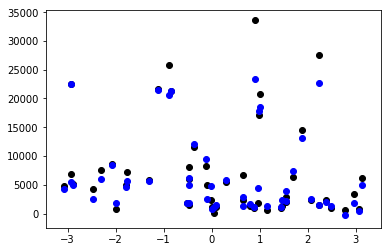

In [170]:
# Plot outputd
plt.scatter(testX.T[0][:50], testy[:50] , color='black')
plt.scatter(testX.T[0][:50] , y_pred[:50] , color='blue')

plt.show()

#### Polynomial regression

In [171]:
# transformation of feature into a polynomial world
poly = PolynomialFeatures(degree=2)
X_transformed = poly.fit_transform(Xperiodic)

shuffleX, shuffley = shuffle(X_transformed, y)

# Take 1/5 of the dataset to test
testX, testy = shuffleX[:(len(X_transformed)/5)], shuffley[:(len(X_transformed)/5)]
trainX, trainy = shuffleX[(len(X_transformed)/5):], shuffley[(len(X_transformed)/5):]

linear.fit(trainX, trainy)
y_pred = linear.predict(testX)

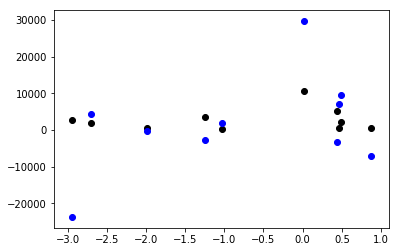

In [172]:
# Plot outputs
plt.scatter(testX.T[3][:10], testy[:10] , color='black')
plt.scatter(testX.T[3][:10] , y_pred[:10] , color='blue')

plt.show()

In [173]:
MAE = mean_absolute_error(testy, y_pred)
MAE

13897.97250365929

#### Ridge regression: does the sales volumes are independant ?

In [114]:
ridge = Ridge(alpha=1.0)

shuffleX, shuffley = shuffle(X, y)

# Take 1/5 of the dataset to test
testX, testy = shuffleX[:(len(X)/5)], shuffley[:(len(X)/5)]
trainX, trainy = shuffleX[(len(X)/5):], shuffley[(len(X)/5):]

ridge.fit(trainX, trainy)
y_pred = ridge.predict(testX)

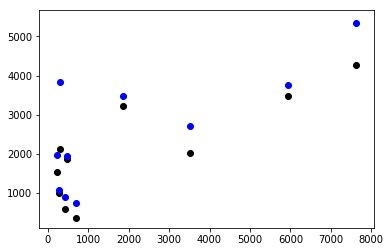

In [115]:
# Plot outputs
plt.scatter(testX.T[3][:10], testy[:10] , color='black')
plt.scatter(testX.T[3][:10] , y_pred[:10] , color='blue')

plt.show()

In [116]:
MAE = mean_absolute_error(testy, y_pred)
MAE

1285.4556077564198

#### Lasso regression: feature selection -> maybe only last sales volume is usefull for prediction

In [119]:
lasso = Lasso(alpha=0.1, max_iter=10000MAE = mean_absolute_error(testy, y_pred)
MAE)

lasso.fit(trainX, trainy)
y_pred = lasso.predict(testX)

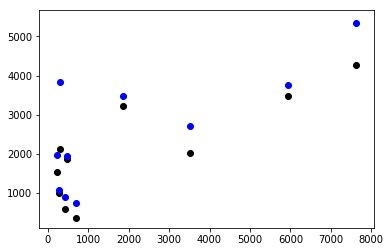

In [120]:
# Plot outputs
plt.scatter(testX.T[3][:10], testy[:10] , color='black')
plt.scatter(testX.T[3][:10] , y_pred[:10] , color='blue')

plt.show()

In [121]:
MAE = mean_absolute_error(testy, y_pred)
MAE

1285.4555626300828

#### Elastic Net regression

In [126]:
elastic = ElasticNet(random_state=0)
elastic.fit(trainX, trainy)
y_pred = elastic.predict(testX)

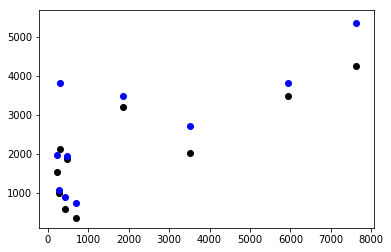

In [127]:
# Plot outputs
plt.scatter(testX.T[3][:10], testy[:10] , color='black')
plt.scatter(testX.T[3][:10] , y_pred[:10] , color='blue')

plt.show()

In [128]:
MAE = mean_absolute_error(testy, y_pred)
MAE

1285.9682861898596

#### a NN 

In [129]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(trainX, trainy)
y_pred = regr.predict(testX)

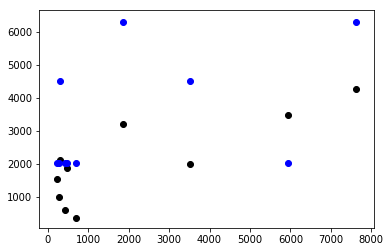

In [130]:
# Plot outputs
plt.scatter(testX.T[3][:10], testy[:10] , color='black')
plt.scatter(testX.T[3][:10] , y_pred[:10] , color='blue')

plt.show()

In [131]:
MAE = mean_absolute_error(testy, y_pred)
MAE

1696.0243370267397

In [60]:
serie = df2[84146]

In [63]:
len(serie[:-1])

1

In [65]:
serie[-2:-1]

2017-06-25 21:00:00    30.0
Name: 84146, dtype: float64

In [66]:
X = serie[:-1] 

In [67]:
y = serie[-2: 1]

In [70]:
X.shape

(11935L,)

In [68]:
ols = LinearRegression()
scores = cross_val_score(ols, X, y, cv=5)

ValueError: Found input variables with inconsistent numbers of samples: [11935, 0]

In [24]:
X = np.asarray(df.columns.weekofyear.tolist()).reshape(-1, 1)

In [25]:
len(X)

11936

In [26]:
y = df.T

In [27]:
ols = LinearRegression()
scores = cross_val_score(ols, X, y, cv=5)

In [29]:
scores

array([-0.0941456 , -0.04343905, -0.00896717, -0.02839649, -0.02747364])

In [28]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.04 (+/- 0.06)


In [ ]:
#clf = ARDRegression(compute_score=True)
#clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(ols, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
df1 = df[:7]

In [20]:
df1.index

Int64Index([10055, 10077, 10079, 10081, 10085, 10086, 10111], dtype='int64', name=u'store_code')

In [21]:
df1.iloc[0].values

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [23]:
# Create traces
trace0 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[0].values,
    mode = 'lines',
    name = 'lines'
)

trace1 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[1].values,
    mode = 'lines',
    name = 'lines'
)

trace2 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[2].values,
    mode = 'lines',
    name = 'lines'
)

trace3 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[3].values,
    mode = 'lines',
    name = 'lines'
)

trace4 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[4].values,
    mode = 'lines',
    name = 'lines'
)

trace5 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[5].values,
    mode = 'lines',
    name = 'lines'
)

trace6 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[6].values,
    mode = 'lines',
    name = 'lines'
)

In [24]:
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

In [9]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print __version__ # requires version >= 1.9.0

2.2.2


In [10]:
from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file://C:\\Users\\Sabrine\\Documents\\notebook\\temp-plot.html'

In [11]:
init_notebook_mode(connected=True)

In [12]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [7]:
json = pd.read_json('UseCase_3_Datasets\Surroundings.json')